In [1]:
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
from keras.models import load_model

In [3]:
batch_size = 20
directory = './images_evaluation/Angelic/'
train, test, labels = load_directory(directory)
loss_tracker = LossTracker()
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)) #Use the entire validation set here.

In [4]:
input_shape = (105, 105, 1)
n_class = len(labels)
routings = 3
reconstruction_loss = .392

In [5]:
convnet = make_convnet(input_shape, n_class, width=64, dropout=.5)
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 97, 97, 64)        5248      
_________________________________________________________________
conv2 (Conv2D)               (None, 93, 93, 128)       204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 93, 93, 128)       0         
_________________________________________________________________
maxp1 (MaxPooling2D)         (None, 46, 46, 128)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 45, 45, 128)       65664     
_________________________________________________________________
conv4 (Conv2D)               (None, 44, 44, 256)       131328    
__________

In [6]:
history = train_convnet(convnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker)

Epoch 1/200
100/100 [==============================] - 13s 130ms/step - loss: 2.9977 - categorical_accuracy: 0.0485 - val_loss: 2.9958 - val_categorical_accuracy: 0.0500

Epoch 00001: val_categorical_accuracy improved from -inf to 0.05000, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00001: val_loss improved from inf to 2.99578, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 2/200
100/100 [==============================] - 8s 82ms/step - loss: 2.9971 - categorical_accuracy: 0.0565 - val_loss: 2.9957 - val_categorical_accuracy: 0.0500

Epoch 00002: val_categorical_accuracy did not improve from 0.05000

Epoch 00002: val_loss improved from 2.99578 to 2.99573, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 3/200
100/100 [==============================] - 8s 83ms/step - loss: 2.9970 - categorical_accuracy: 0.0525 - val_loss: 2.9957 - val_categorical_accuracy: 0.0500

Epoch 00003: val_categorical_accuracy did not improve 


Epoch 00023: val_loss improved from 2.81372 to 2.68803, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 24/200
100/100 [==============================] - 8s 83ms/step - loss: 1.1367 - categorical_accuracy: 0.6265 - val_loss: 2.5690 - val_categorical_accuracy: 0.4711

Epoch 00024: val_categorical_accuracy improved from 0.42105 to 0.47105, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00024: val_loss improved from 2.68803 to 2.56900, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 25/200
100/100 [==============================] - 8s 83ms/step - loss: 1.0075 - categorical_accuracy: 0.7045 - val_loss: 2.5648 - val_categorical_accuracy: 0.4816

Epoch 00025: val_categorical_accuracy improved from 0.47105 to 0.48158, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00025: val_loss improved from 2.56900 to 2.56482, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 26/200
100/100 [=====

Epoch 46/200
100/100 [==============================] - 8s 82ms/step - loss: 0.4921 - categorical_accuracy: 0.8475 - val_loss: 2.1623 - val_categorical_accuracy: 0.6684

Epoch 00046: val_categorical_accuracy improved from 0.66579 to 0.66842, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00046: val_loss did not improve from 2.14191
Epoch 47/200
100/100 [==============================] - 8s 82ms/step - loss: 0.4654 - categorical_accuracy: 0.8550 - val_loss: 2.1664 - val_categorical_accuracy: 0.6500

Epoch 00047: val_categorical_accuracy did not improve from 0.66842

Epoch 00047: val_loss did not improve from 2.14191
Epoch 48/200
100/100 [==============================] - 8s 82ms/step - loss: 0.4601 - categorical_accuracy: 0.8580 - val_loss: 2.1431 - val_categorical_accuracy: 0.6553

Epoch 00048: val_categorical_accuracy did not improve from 0.66842

Epoch 00048: val_loss did not improve from 2.14191
Epoch 49/200
100/100 [==============================] - 8s 82ms/s

Epoch 72/200
100/100 [==============================] - 8s 82ms/step - loss: 0.2709 - categorical_accuracy: 0.9120 - val_loss: 1.8849 - val_categorical_accuracy: 0.6947

Epoch 00072: val_categorical_accuracy did not improve from 0.69737

Epoch 00072: val_loss did not improve from 1.81122
Epoch 73/200
100/100 [==============================] - 8s 82ms/step - loss: 0.2394 - categorical_accuracy: 0.9185 - val_loss: 1.8848 - val_categorical_accuracy: 0.7105

Epoch 00073: val_categorical_accuracy improved from 0.69737 to 0.71053, saving model to ./models/images_evaluation/Angelic/best_acc.h5

Epoch 00073: val_loss did not improve from 1.81122
Epoch 74/200
100/100 [==============================] - 8s 82ms/step - loss: 0.2517 - categorical_accuracy: 0.9215 - val_loss: 1.8397 - val_categorical_accuracy: 0.6868

Epoch 00074: val_categorical_accuracy did not improve from 0.71053

Epoch 00074: val_loss did not improve from 1.81122
Epoch 75/200
100/100 [==============================] - 8s 82ms/s

Epoch 99/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1677 - categorical_accuracy: 0.9410 - val_loss: 1.7208 - val_categorical_accuracy: 0.6895

Epoch 00099: val_categorical_accuracy did not improve from 0.71316

Epoch 00099: val_loss did not improve from 1.70577
Epoch 100/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1447 - categorical_accuracy: 0.9515 - val_loss: 1.6793 - val_categorical_accuracy: 0.6974

Epoch 00100: val_categorical_accuracy did not improve from 0.71316

Epoch 00100: val_loss improved from 1.70577 to 1.67929, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 101/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1584 - categorical_accuracy: 0.9535 - val_loss: 1.7458 - val_categorical_accuracy: 0.7132

Epoch 00101: val_categorical_accuracy did not improve from 0.71316

Epoch 00101: val_loss did not improve from 1.67929
Epoch 102/200
100/100 [==============================] - 8s 82

100/100 [==============================] - 8s 83ms/step - loss: 0.1101 - categorical_accuracy: 0.9680 - val_loss: 1.6701 - val_categorical_accuracy: 0.7105

Epoch 00126: val_categorical_accuracy did not improve from 0.72368

Epoch 00126: val_loss did not improve from 1.64897
Epoch 127/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1391 - categorical_accuracy: 0.9580 - val_loss: 1.6923 - val_categorical_accuracy: 0.7132

Epoch 00127: val_categorical_accuracy did not improve from 0.72368

Epoch 00127: val_loss did not improve from 1.64897
Epoch 128/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1003 - categorical_accuracy: 0.9690 - val_loss: 1.6745 - val_categorical_accuracy: 0.7079

Epoch 00128: val_categorical_accuracy did not improve from 0.72368

Epoch 00128: val_loss did not improve from 1.64897
Epoch 129/200
100/100 [==============================] - 8s 82ms/step - loss: 0.1052 - categorical_accuracy: 0.9630 - val_loss: 1.6267 - val_cat

Epoch 181/200
100/100 [==============================] - 8s 82ms/step - loss: 0.0866 - categorical_accuracy: 0.9745 - val_loss: 1.5752 - val_categorical_accuracy: 0.7211

Epoch 00181: val_categorical_accuracy did not improve from 0.73158

Epoch 00181: val_loss did not improve from 1.54626
Epoch 182/200
100/100 [==============================] - 8s 82ms/step - loss: 0.0787 - categorical_accuracy: 0.9740 - val_loss: 1.5706 - val_categorical_accuracy: 0.7184

Epoch 00182: val_categorical_accuracy did not improve from 0.73158

Epoch 00182: val_loss did not improve from 1.54626
Epoch 183/200
100/100 [==============================] - 8s 82ms/step - loss: 0.0652 - categorical_accuracy: 0.9800 - val_loss: 1.5282 - val_categorical_accuracy: 0.7158

Epoch 00183: val_categorical_accuracy did not improve from 0.73158

Epoch 00183: val_loss improved from 1.54626 to 1.52822, saving model to ./models/images_evaluation/Angelic/best_loss.h5
Epoch 184/200
100/100 [==============================] - 8s 8

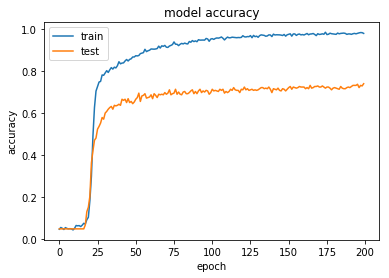

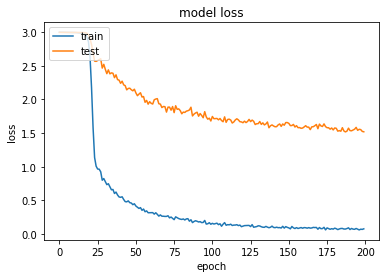

In [7]:
plot_history(history)

In [5]:
results1, results2, results3 = quiz_models(directory, test, labels, visualize=True, train_df=train)


quizzing best accuracy model...

Quiz results: 281 out of 380 correct.
Quiz accuracy score: 0.739. Error rate: 0.261
Classification results: 312 out of 380 correct.
Classification accuracy score: 0.821. Error rate: 0.179

quizzing best loss model...

Quiz results: 272 out of 380 correct.
Quiz accuracy score: 0.716. Error rate: 0.284
Classification results: 303 out of 380 correct.
Classification accuracy score: 0.797. Error rate: 0.203

quizzing best overfit model...

Quiz results: 281 out of 380 correct.
Quiz accuracy score: 0.739. Error rate: 0.261
Classification results: 312 out of 380 correct.
Classification accuracy score: 0.821. Error rate: 0.179


In [5]:
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.35
)

Instructions for updating:
dim is deprecated, use axis instead


In [6]:
loss_tracker = LossTracker(scale_by=3)
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=batch_size)
val_steps = len(test)//batch_size
history = train_capsnet(capsnet, tg, vg, directory, verbose=True, loss_obj=loss_tracker, validation_steps=val_steps)

Epoch 1/100
100/100 [==============================] - 176s 2s/step - loss: 0.5185 - capsnet_loss: 0.4632 - decoder_loss: 0.1411 - capsnet_acc: 0.4670 - val_loss: 0.4907 - val_capsnet_loss: 0.4510 - val_decoder_loss: 0.1011 - val_capsnet_acc: 0.3895

Epoch 00001: val_capsnet_acc improved from -inf to 0.38947, saving model to ./models/images_evaluation/Angelic/best_acc_caps.h5

Epoch 00001: val_loss improved from inf to 0.49066, saving model to ./models/images_evaluation/Angelic/best_loss_caps.h5
Epoch 2/100
100/100 [==============================] - 177s 2s/step - loss: 0.1631 - capsnet_loss: 0.1282 - decoder_loss: 0.0892 - capsnet_acc: 0.8580 - val_loss: 0.3532 - val_capsnet_loss: 0.3167 - val_decoder_loss: 0.0930 - val_capsnet_acc: 0.5605

Epoch 00002: val_capsnet_acc improved from 0.38947 to 0.56053, saving model to ./models/images_evaluation/Angelic/best_acc_caps.h5

Epoch 00002: val_loss improved from 0.49066 to 0.35319, saving model to ./models/images_evaluation/Angelic/best_loss

100/100 [==============================] - 175s 2s/step - loss: 0.0296 - capsnet_loss: 0.0044 - decoder_loss: 0.0642 - capsnet_acc: 1.0000 - val_loss: 0.2934 - val_capsnet_loss: 0.2598 - val_decoder_loss: 0.0858 - val_capsnet_acc: 0.7211

Epoch 00020: val_capsnet_acc did not improve from 0.72632

Epoch 00020: val_loss did not improve from 0.27408
Epoch 21/100
100/100 [==============================] - 180s 2s/step - loss: 0.0300 - capsnet_loss: 0.0052 - decoder_loss: 0.0633 - capsnet_acc: 0.9990 - val_loss: 0.2784 - val_capsnet_loss: 0.2447 - val_decoder_loss: 0.0860 - val_capsnet_acc: 0.7263

Epoch 00021: val_capsnet_acc did not improve from 0.72632

Epoch 00021: val_loss did not improve from 0.27408
Epoch 22/100
100/100 [==============================] - 191s 2s/step - loss: 0.0290 - capsnet_loss: 0.0044 - decoder_loss: 0.0627 - capsnet_acc: 1.0000 - val_loss: 0.2813 - val_capsnet_loss: 0.2478 - val_decoder_loss: 0.0855 - val_capsnet_acc: 0.7237

Epoch 00022: val_capsnet_acc did not 


Epoch 00042: val_capsnet_acc did not improve from 0.73421

Epoch 00042: val_loss did not improve from 0.27408
Epoch 43/100
100/100 [==============================] - 184s 2s/step - loss: 0.0261 - capsnet_loss: 0.0024 - decoder_loss: 0.0603 - capsnet_acc: 1.0000 - val_loss: 0.2807 - val_capsnet_loss: 0.2472 - val_decoder_loss: 0.0854 - val_capsnet_acc: 0.7316

Epoch 00043: val_capsnet_acc did not improve from 0.73421

Epoch 00043: val_loss did not improve from 0.27408
Epoch 44/100
100/100 [==============================] - 186s 2s/step - loss: 0.0265 - capsnet_loss: 0.0028 - decoder_loss: 0.0605 - capsnet_acc: 1.0000 - val_loss: 0.2797 - val_capsnet_loss: 0.2462 - val_decoder_loss: 0.0854 - val_capsnet_acc: 0.7395

Epoch 00044: val_capsnet_acc improved from 0.73421 to 0.73947, saving model to ./models/images_evaluation/Angelic/best_acc_caps.h5

Epoch 00044: val_loss did not improve from 0.27408
Epoch 45/100
100/100 [==============================] - 177s 2s/step - loss: 0.0266 - capsne

KeyboardInterrupt: 

In [7]:
results_caps1, results_caps2, results_caps3 = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model
)


quizzing best accuracy model...



ValueError: Unknown layer: CapsuleLayer

In [12]:
manipulate_model.set_weights(capsnet.get_weights())
eval_model.set_weights(capsnet.get_weights())

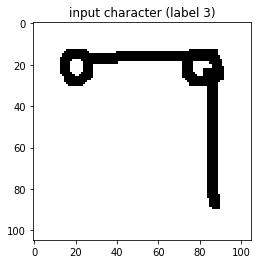

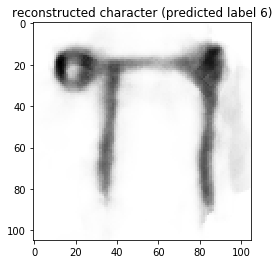

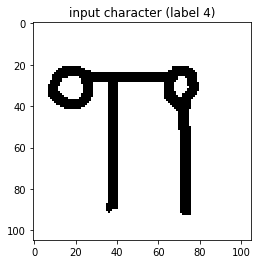

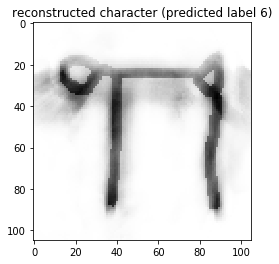

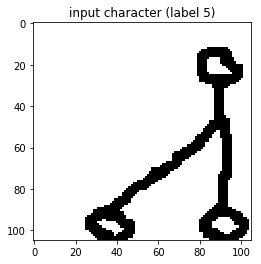

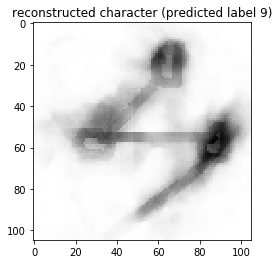

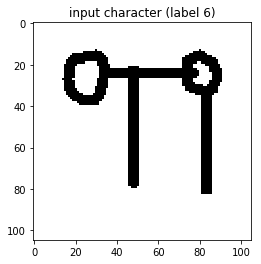

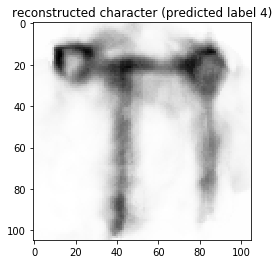

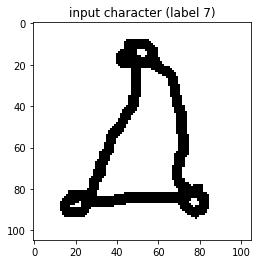

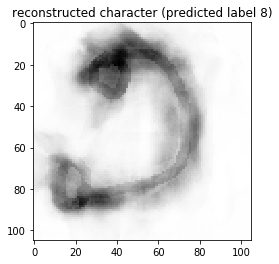

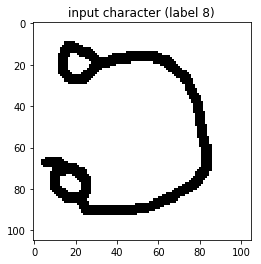

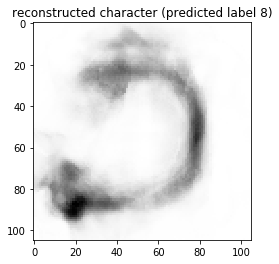

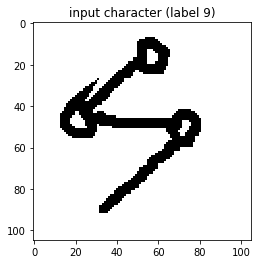

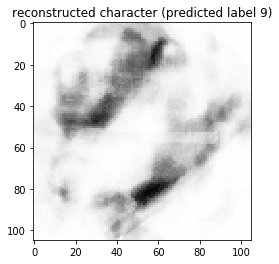

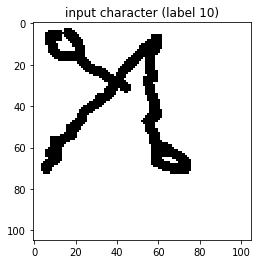

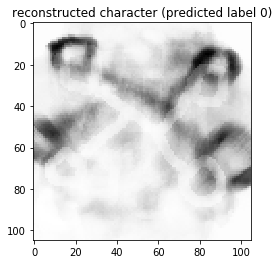

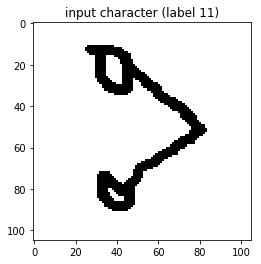

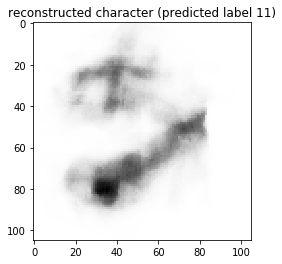

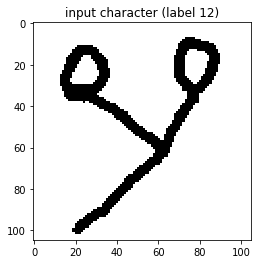

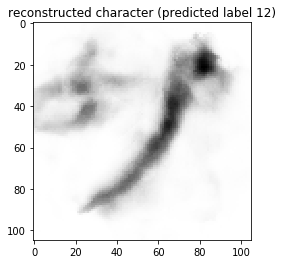

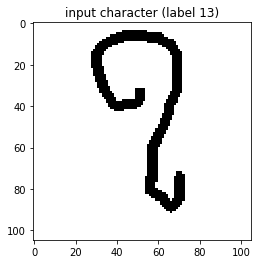

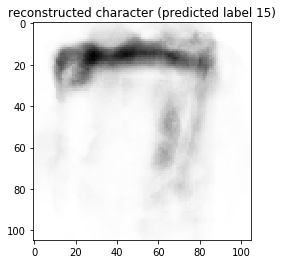

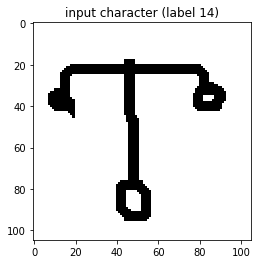

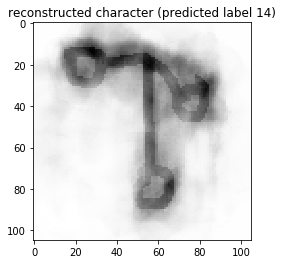

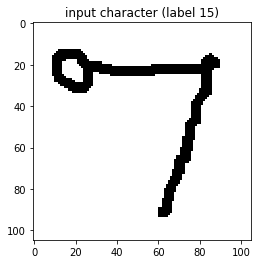

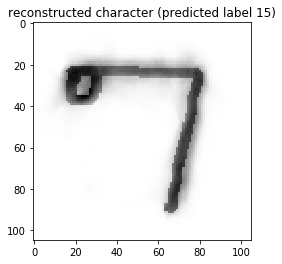

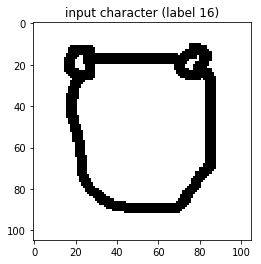

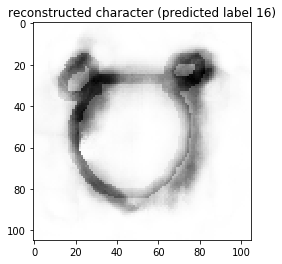

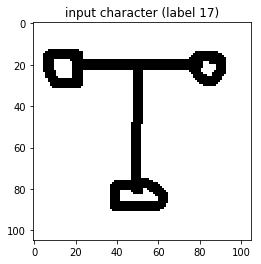

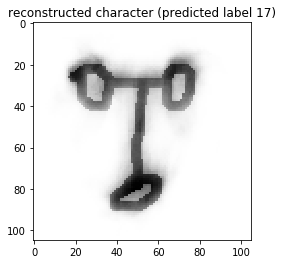

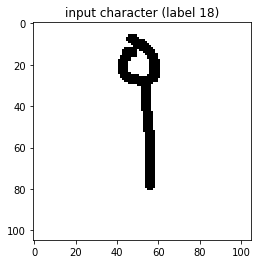

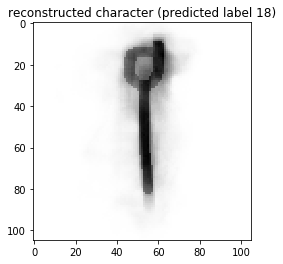

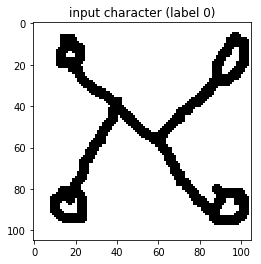

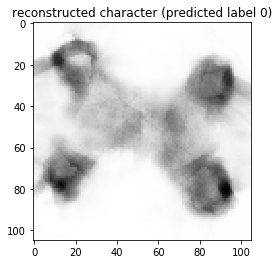

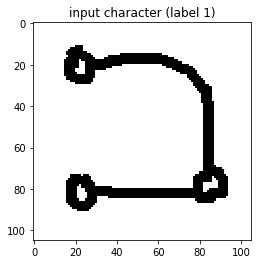

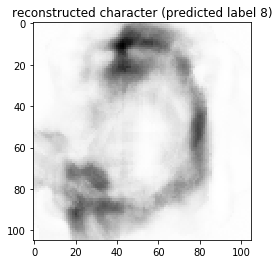

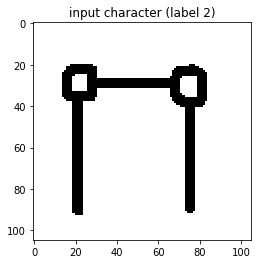

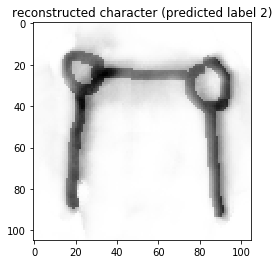

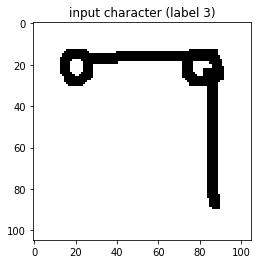

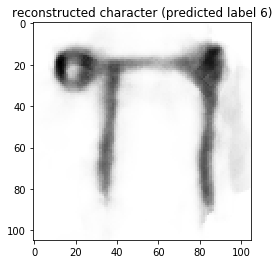

In [35]:
def plot_outputs(model, val_gen, test):
    """Looks at outputs of capsnet."""
    fig, ax = plt.subplots()
    for i in range(20):
        X, Y = next(val_gen)
        Y_pred, reconstructed = model.predict(X)
        img = X[0, :, :, 0]
        plt.title('input character (label {})'.format(np.argmax(Y[0, :])));
        plt.imshow(img, cmap='Greys_r');
        plt.show();
        plt.title('reconstructed character (predicted label {})'.format(np.argmax(Y_pred[0, :])));
        plt.imshow(reconstructed[0, :, :, 0], cmap='Greys_r');
        plt.show();
    return

plot_outputs(eval_model, vg, test)

In [23]:
eval_model.outputs

[<tf.Tensor 'capsnet/Sqrt:0' shape=(?, 20) dtype=float32>,
 <tf.Tensor 'decoder_1/out_recon/Reshape:0' shape=(?, 105, 105, 1) dtype=float32>]